In [191]:
import pandas as pd

## 분석용 통계 데이터 불러오기

In [249]:
df = pd.concat([pd.read_csv("./sk_section_statistics.csv"), pd.read_csv("./betterwhy_section_statistics.csv")])
df['car_type'] = df['car_type'].replace('G80E', 'G80')
df

,car_id,car_type,charge_type,start_time,end_time,soh,p_volt,p_current,cell_volt_diff,soc_start,...,mileage,accum_mileage,km_per_kWh,speed_0,speed_0_30,speed_30_60,speed_60_90,speed_90_180,model_year,model_month
0,M1200607445,IONIQ5,discharge,2022-01-22 07:40:46.000,2022-01-22 08:08:17.000,100.0,688.742771,10.078313,0.015060,71.0,...,25.0,4691.0,3.676471,23.0,23.0,52.0,35.0,28.0,NaN,NaN
1,M1200607199,NIRO,discharge,2022-06-18 15:43:28,2022-06-18 17:06:51,100.0,351.014170,29.982186,0.003279,45.0,...,100.0,31725.0,6.134969,34.0,68.0,40.0,44.0,304.0,NaN,NaN
2,M2210704031,EV6,discharge,2022-06-14 19:53:17,2022-06-15 00:08:35,100.0,775.018750,3.877361,0.009167,96.0,...,117.0,50250.0,5.763547,291.0,122.0,153.0,120.0,19.0,NaN,NaN
3,M1200607322,IONIQ5,discharge,2022-06-13 14:43:17,2022-06-13 17:23:30,100.0,724.475220,7.252203,0.007291,93.5,...,108.0,12601.0,5.654450,99.0,243.0,256.0,236.0,45.0,NaN,NaN
4,M2210703646,EV6,discharge,2022-05-29 15:41:38,2022-05-29 17:10:04,100.0,752.867442,8.120155,0.007597,79.0,...,52.0,19712.0,5.909091,18.0,38.0,29.0,38.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36734,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-08-07 22:00:00:966,2024-08-08 04:02:03:256,100.0,744.765899,8.072201,0.006772,45.0,...,0.0,44448.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36735,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-08-01 22:00:45:911,2024-08-02 03:46:42:474,100.0,747.009458,8.059742,0.006840,45.5,...,0.0,44191.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36736,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-08-19 22:00:37:369,2024-08-20 05:49:33:909,100.0,734.813780,8.188490,0.006467,31.0,...,0.0,44965.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36737,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-09-01 22:00:28:312,2024-09-02 06:16:06:264,100.0,733.664765,8.088426,0.004632,27.5,...,0.0,46382.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0


In [250]:
# p_current 값 조건에 따라 NaN으로 대체
# charge_type이 discharge인데 p_current가 양수인 경우 NaN으로 대체
df.loc[(df['charge_type'] == 'discharge') & (df['p_current'] < 0), 'p_current'] = float('nan')
df.loc[(df['charge_type'] == 'fast_charge') & (df['p_current'] > 0), 'p_current'] = float('nan')
df.loc[(df['charge_type'] == 'slow_charge') & (df['p_current'] > 0), 'p_current'] = float('nan')
# charge_type이 fast_charge 또는 slow_charge인데 p_current가 음수인 경우 NaN으로 대체
df

,car_id,car_type,charge_type,start_time,end_time,soh,p_volt,p_current,cell_volt_diff,soc_start,...,mileage,accum_mileage,km_per_kWh,speed_0,speed_0_30,speed_30_60,speed_60_90,speed_90_180,model_year,model_month
0,M1200607445,IONIQ5,discharge,2022-01-22 07:40:46.000,2022-01-22 08:08:17.000,100.0,688.742771,10.078313,0.015060,71.0,...,25.0,4691.0,3.676471,23.0,23.0,52.0,35.0,28.0,NaN,NaN
1,M1200607199,NIRO,discharge,2022-06-18 15:43:28,2022-06-18 17:06:51,100.0,351.014170,29.982186,0.003279,45.0,...,100.0,31725.0,6.134969,34.0,68.0,40.0,44.0,304.0,NaN,NaN
2,M2210704031,EV6,discharge,2022-06-14 19:53:17,2022-06-15 00:08:35,100.0,775.018750,3.877361,0.009167,96.0,...,117.0,50250.0,5.763547,291.0,122.0,153.0,120.0,19.0,NaN,NaN
3,M1200607322,IONIQ5,discharge,2022-06-13 14:43:17,2022-06-13 17:23:30,100.0,724.475220,7.252203,0.007291,93.5,...,108.0,12601.0,5.654450,99.0,243.0,256.0,236.0,45.0,NaN,NaN
4,M2210703646,EV6,discharge,2022-05-29 15:41:38,2022-05-29 17:10:04,100.0,752.867442,8.120155,0.007597,79.0,...,52.0,19712.0,5.909091,18.0,38.0,29.0,38.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36734,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-08-07 22:00:00:966,2024-08-08 04:02:03:256,100.0,744.765899,NaN,0.006772,45.0,...,0.0,44448.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36735,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-08-01 22:00:45:911,2024-08-02 03:46:42:474,100.0,747.009458,NaN,0.006840,45.5,...,0.0,44191.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36736,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-08-19 22:00:37:369,2024-08-20 05:49:33:909,100.0,734.813780,NaN,0.006467,31.0,...,0.0,44965.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36737,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-09-01 22:00:28:312,2024-09-02 06:16:06:264,100.0,733.664765,NaN,0.004632,27.5,...,0.0,46382.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0


## SoH 변화 비교를 위한 두 차량 선정
- 총 주행거리,차종이 같은 두차량들 중 특정기간동안 비슷한 주행거리를 가졌지만 soh 감소량이 다른 두 차량 선정
- 아래와 같은 방식으로 찾아냄
- V004BA0003
- V004BA0014

In [251]:
carid_list = []
filtered_df = df[df['car_type'] == 'EV6_LONGRANGE']
for car_id, group in filtered_df.groupby('car_id'):
    if group['soh'].max() < 98:
        carid_list.append(car_id)
carid_list

['SITESTEV6',
 'V004BA0003',
 'V004BA0014',
 'V004BA0015',
 'V004BE0008',
 'V004BG0001',
 'V004BG0005',
 'V03BA0023']

In [276]:
print("차량ID, 총 주행거리, 주행거리, 처음 soh 량, 마지막 soh량, soh 감소량")
for carid in carid_list:
    car_df = filtered_df[filtered_df['car_id'] == carid]
    #if car_df['soh'].max() - car_df['soh'].min() > 5:
    print(carid, car_df['accum_mileage'].max(), car_df['mileage'].sum(),car_df['soh'].max(), car_df['soh'].min(), car_df['soh'].max() - car_df['soh'].min())

차량ID, 총 주행거리, 주행거리, 처음 soh 량, 마지막 soh량, soh 감소량
SITESTEV6 142914.0 61591.0 97.6999969482422 95.2 2.499996948242199
V004BA0003 159199.0 28930.0 94.0999984741211 88.8 5.299998474121097
V004BA0014 151471.0 20195.0 95.9 90.6 5.300000000000011
V004BA0015 116235.0 2001.0 95.3000030517578 94.1999969482422 1.1000061035155966
V004BE0008 97240.0 13047.0 96.8 94.2 2.5999999999999943
V004BG0001 31044.0 3135.0 96.3 94.7 1.5999999999999943
V004BG0005 18904.0 394.0 95.5 95.5 0.0
V03BA0023 126274.0 27797.0 97.1 96.2 0.8999999999999915


In [253]:
filtered_df2 = filtered_df[filtered_df['start_time'] > '2024-08-05']
filtered_df2

,car_id,car_type,charge_type,start_time,end_time,soh,p_volt,p_current,cell_volt_diff,soc_start,...,mileage,accum_mileage,km_per_kWh,speed_0,speed_0_30,speed_30_60,speed_60_90,speed_90_180,model_year,model_month
5022,V004BA0004,EV6_LONGRANGE,discharge,2024-08-06 11:17:52:630,2024-08-06 17:12:28:756,100.0,771.376313,NaN,0.007576,97.0,...,94.0,101822.0,2.281553,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
5026,V004BF0006,EV6_LONGRANGE,discharge,2024-08-06 08:07:23:389,2024-08-06 09:00:08:124,100.0,738.104300,NaN,0.006549,68.5,...,33.0,32237.0,3.975904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5048,V004AL0005,EV6_LONGRANGE,discharge,2024-08-07 06:07:08:502,2024-08-07 08:59:54:882,100.0,778.964815,NaN,0.005920,93.0,...,64.0,82014.0,3.386243,NaN,NaN,NaN,NaN,NaN,2023.0,7.0
5079,SITESTEV6,EV6_LONGRANGE,discharge,2024-08-05 17:53:00:375,2024-08-06 01:24:22:155,95.8,732.539343,NaN,0.006807,74.0,...,149.0,129111.0,3.274725,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
5085,V004BA0030,EV6_LONGRANGE,discharge,2024-08-05 20:19:14:476,2024-08-06 04:25:16:990,100.0,733.067400,NaN,0.008381,82.0,...,193.0,227367.0,2.281324,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36027,V004BA0019,EV6_LONGRANGE,slow_charge,2024-08-11 01:25:12:352,2024-08-11 06:00:25:700,100.0,753.538145,NaN,0.006476,54.5,...,0.0,144885.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36031,V004BF0003,EV6_LONGRANGE,slow_charge,2024-08-18 00:06:57:549,2024-08-18 06:39:56:995,100.0,739.451869,NaN,0.005267,50.5,...,0.0,10464.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36032,V004BE0003,EV6_LONGRANGE,slow_charge,2024-09-01 20:23:15:769,2024-09-02 05:25:20:534,100.0,719.815399,NaN,0.004640,32.0,...,0.0,93076.0,0.000000,NaN,NaN,NaN,NaN,NaN,2021.0,1.0
36034,V004BF0003,EV6_LONGRANGE,slow_charge,2024-08-31 19:40:21:584,2024-09-01 06:56:11:597,100.0,735.657357,NaN,0.005159,20.5,...,0.0,11680.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
for carid in carid_list:
    car_df = filtered_df2[filtered_df2['car_id'] == carid]
    print(carid, car_df['accum_mileage'].max(), car_df['mileage'].sum(),car_df['soh'].max(), car_df['soh'].min(), car_df['soh'].max() - car_df['soh'].min())

SITESTEV6 142914.0 13820.0 95.8 95.2 0.5999999999999943
V004BA0003 159199.0 10044.0 91.9 88.8 3.1000000000000085
V004BA0014 151471.0 10004.0 95.0 90.6 4.400000000000006
V004BA0015 nan 0.0 nan nan nan
V004BE0008 97240.0 6898.0 96.8 94.9 1.8999999999999915
V004BG0001 31044.0 3135.0 96.3 94.7 1.5999999999999943
V004BG0005 18904.0 394.0 95.5 95.5 0.0
V03BA0023 126274.0 12071.0 96.8 96.3 0.5


In [255]:
filtered_df = filtered_df[filtered_df['start_time'].str.len() >= 20]

In [256]:
df1 = filtered_df[filtered_df['car_id'] == 'V004BA0003']
df2 = filtered_df[filtered_df['car_id'] == 'V004BA0014']

/tmp/ipykernel_407860/3701208211.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['start_time'] = df1['start_time'].apply(normalize_datetime_format)
/tmp/ipykernel_407860/3701208211.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['start_time'] = df2['start_time'].apply(normalize_datetime_format)


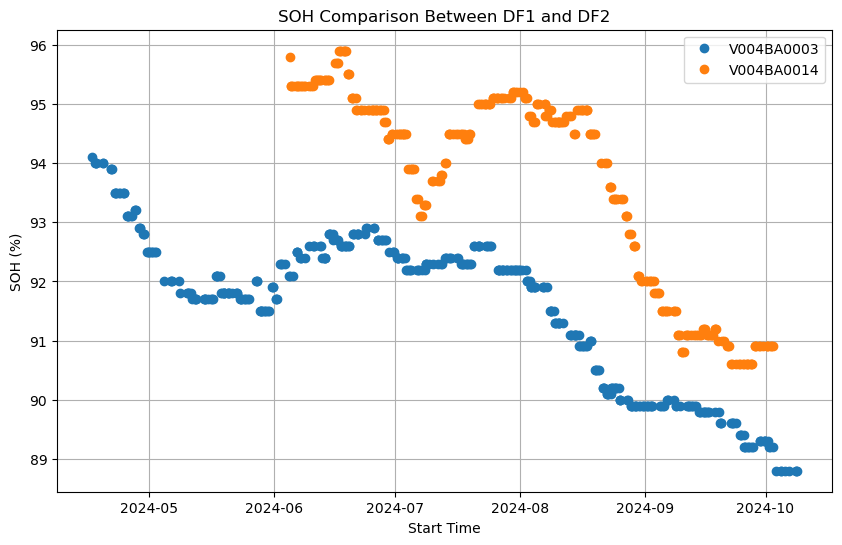

In [247]:
import matplotlib.pyplot as plt
import datetime


# 두 형식을 모두 지원하도록 동적 처리
def normalize_datetime_format(date_str):
    if '.' in date_str:
        date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S.%f")
    elif len(date_str) >= 23:
        date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S:%f")
    elif len(date_str) >= 20:
        date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
    return date_obj


# start_time을 datetime 형식으로 변환
df1['start_time'] = df1['start_time'].apply(normalize_datetime_format)
df2['start_time'] = df2['start_time'].apply(normalize_datetime_format)

# 그래프 생성
plt.figure(figsize=(10, 6))

# df1의 데이터 플롯
plt.plot(df1['start_time'], df1['soh'], label=df1.iloc[0]['car_id'], linestyle='none', marker='o')

# df2의 데이터 플롯
plt.plot(df2['start_time'], df2['soh'], label=df2.iloc[0]['car_id'], linestyle='none', marker='o')

# 그래프 꾸미기
plt.title('SOH Comparison Between DF1 and DF2')
plt.xlabel('Start Time')
plt.ylabel('SOH (%)')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

In [257]:
filtered_df = filtered_df[filtered_df['start_time'].str.len() >= 20]
df1 = filtered_df[filtered_df['car_id'] == 'V004BA0003']
df2 = filtered_df[filtered_df['car_id'] == 'V004BA0014']
df1 = df1[df1['start_time'] > "2024-08-01"]
df2 = df2[df2['start_time'] > "2024-08-01"]
df1 = df1[df1['start_time'] < "2024-10-01"]
df2 = df2[df2['start_time'] < "2024-10-01"]

# 기간 필터링 후 두차량의 SoH 변화 비교
- V004BA0014 차량 : 4.3% 감소
- V004BA0003 차량 : 2.9% 감소

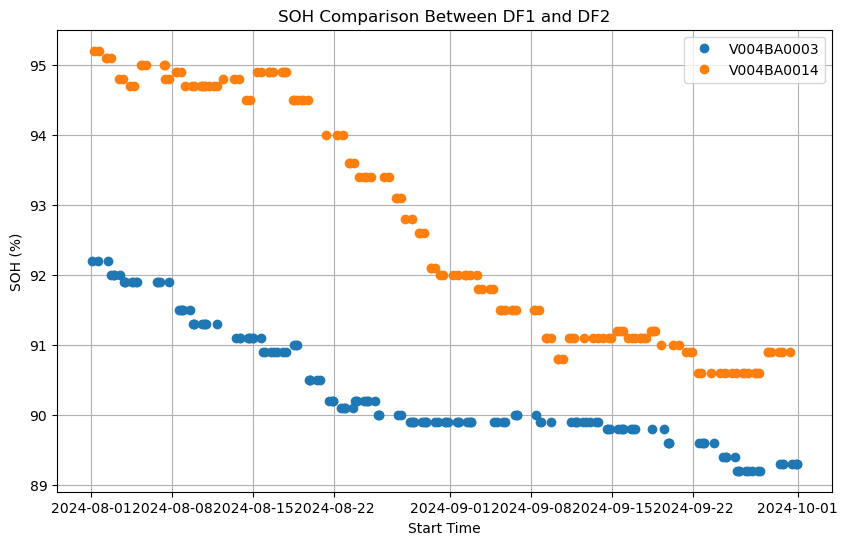

In [248]:
# start_time을 datetime 형식으로 변환
df1['start_time'] = df1['start_time'].apply(normalize_datetime_format)
df2['start_time'] = df2['start_time'].apply(normalize_datetime_format)

# 그래프 생성
plt.figure(figsize=(10, 6))

# df1의 데이터 플롯
plt.plot(df1['start_time'], df1['soh'], label=df1.iloc[0]['car_id'], linestyle='none', marker='o')

# df2의 데이터 플롯
plt.plot(df2['start_time'], df2['soh'], label=df2.iloc[0]['car_id'], linestyle='none', marker='o')

# 그래프 꾸미기
plt.title('SOH Comparison Between DF1 and DF2')
plt.xlabel('Start Time')
plt.ylabel('SOH (%)')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

In [258]:
df1.sort_values(by=['start_time'], inplace=True)
df2.sort_values(by=['start_time'], inplace=True)
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
print("%s %d %d %.1f %.1f %.1f" % (df1.iloc[0]['car_id'], df1['accum_mileage'].max(), df1['mileage'].sum(),df1['soh'].iloc[0], df1['soh'].iloc[-1], df1['soh'].iloc[0] - df1['soh'].iloc[-1]))
print("%s %d %d %.1f %.1f %.1f" % (df2.iloc[0]['car_id'], df2['accum_mileage'].max(), df2['mileage'].sum(),df2['soh'].iloc[0], df2['soh'].iloc[-1], df2['soh'].iloc[0] - df2['soh'].iloc[-1]))

V004BA0003 158219 9832 92.2 89.3 2.9
V004BA0014 151120 10471 95.2 90.9 4.3


In [234]:
df1

,car_id,car_type,charge_type,start_time,end_time,soh,p_volt,p_current,cell_volt_diff,soc_start,...,mileage,accum_mileage,km_per_kWh,speed_0,speed_0_30,speed_30_60,speed_60_90,speed_90_180,model_year,model_month
0,V004BA0003,EV6_LONGRANGE,fast_charge,2024-08-01 02:22:31.778,2024-08-01 03:02:37:603,92.2,743.956860,NaN,0.013053,28.5,...,0.0,148125.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
1,V004BA0003,EV6_LONGRANGE,discharge,2024-08-01 14:27:29.193,2024-08-01 15:47:14:813,92.2,768.834756,NaN,0.007033,87.5,...,21.0,148147.0,2.658228,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
2,V004BA0003,EV6_LONGRANGE,discharge,2024-08-02 11:43:08.648,2024-08-02 16:01:30:361,92.2,738.864159,NaN,0.007195,79.0,...,99.0,148259.0,2.313084,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
3,V004BA0003,EV6_LONGRANGE,discharge,2024-08-02 17:53:09.858,2024-08-02 22:53:38:708,92.0,701.172113,NaN,0.005631,55.5,...,101.0,148360.0,2.475490,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
4,V004BA0003,EV6_LONGRANGE,fast_charge,2024-08-02 22:53:50.735,2024-08-02 23:33:53:890,92.0,750.248297,NaN,0.013771,34.5,...,0.0,148360.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,V004BA0003,EV6_LONGRANGE,discharge,2024-09-29 18:22:17.969,2024-09-30 01:20:33:368,89.3,756.052821,NaN,0.006939,91.5,...,160.0,157961.0,2.758621,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
152,V004BA0003,EV6_LONGRANGE,discharge,2024-09-30 13:13:01.825,2024-09-30 16:15:23:656,89.3,720.692660,NaN,0.007817,64.5,...,57.0,158018.0,2.456897,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
153,V004BA0003,EV6_LONGRANGE,discharge,2024-09-30 18:23:40.204,2024-09-30 21:58:20:636,89.3,702.851723,NaN,0.006446,52.5,...,76.0,158094.0,2.695035,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
154,V004BA0003,EV6_LONGRANGE,fast_charge,2024-09-30 21:58:32.957,2024-09-30 22:32:35:737,89.3,760.024047,NaN,0.017595,39.5,...,0.0,158094.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0


In [235]:
df2

,car_id,car_type,charge_type,start_time,end_time,soh,p_volt,p_current,cell_volt_diff,soc_start,...,mileage,accum_mileage,km_per_kWh,speed_0,speed_0_30,speed_30_60,speed_60_90,speed_90_180,model_year,model_month
0,V004BA0014,EV6_LONGRANGE,discharge,2024-08-01 05:08:44.352,2024-08-01 10:36:09:520,95.2,777.278773,NaN,0.004947,95.5,...,51.0,140246.0,2.931034,NaN,NaN,NaN,NaN,NaN,2022.0,6.0
1,V004BA0014,EV6_LONGRANGE,discharge,2024-08-01 17:14:09.369,2024-08-02 01:02:33:201,95.2,737.041916,NaN,0.006169,83.0,...,166.0,140412.0,2.969589,NaN,NaN,NaN,NaN,NaN,2022.0,6.0
2,V004BA0014,EV6_LONGRANGE,discharge,2024-08-02 07:23:57.402,2024-08-02 09:19:07:579,95.1,703.093707,NaN,0.004045,49.0,...,28.0,140440.0,3.010753,NaN,NaN,NaN,NaN,NaN,2022.0,6.0
3,V004BA0014,EV6_LONGRANGE,fast_charge,2024-08-02 09:19:28.999,2024-08-02 10:21:51:250,95.1,754.726021,NaN,0.008951,44.0,...,0.0,140440.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,6.0
4,V004BA0014,EV6_LONGRANGE,discharge,2024-08-02 17:41:26.204,2024-08-03 03:10:12:356,95.1,750.436471,NaN,0.007292,92.5,...,179.0,140621.0,3.070326,NaN,NaN,NaN,NaN,NaN,2022.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,V004BA0014,EV6_LONGRANGE,discharge,2024-09-28 10:41:07.015,2024-09-28 13:39:18:650,90.9,782.596437,NaN,0.004119,97.0,...,35.0,150683.0,3.535354,NaN,NaN,NaN,NaN,NaN,2022.0,6.0
142,V004BA0014,EV6_LONGRANGE,discharge,2024-09-28 17:19:07.253,2024-09-29 03:40:29:678,90.9,750.467587,NaN,0.005971,89.0,...,204.0,150887.0,3.463497,NaN,NaN,NaN,NaN,NaN,2022.0,6.0
143,V004BA0014,EV6_LONGRANGE,fast_charge,2024-09-29 09:05:29.831,2024-09-29 09:59:05:796,90.9,767.066542,NaN,0.011817,53.5,...,0.0,150903.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,6.0
144,V004BA0014,EV6_LONGRANGE,discharge,2024-09-29 16:52:35.298,2024-09-30 02:22:30:592,90.9,763.542681,NaN,0.005317,95.0,...,184.0,151090.0,3.614931,NaN,NaN,NaN,NaN,NaN,2022.0,6.0


## 두 차량의 충방전 구간 수 비교

In [219]:
df1['charge_type'].value_counts()

charge_type
discharge      117
fast_charge     39
Name: count, dtype: int64

In [220]:
df2['charge_type'].value_counts()

charge_type
discharge      97
fast_charge    49
Name: count, dtype: int64

## 두차량의 주요 지표 통계값 비교

In [221]:
metrics = ['soh', 'km_per_kWh', 'p_volt', 'p_current', 'cell_volt_diff', 'soc_start', 'soc_end', 'soc_quan', 'period', 'charge_discharge_speed', 'power_quan', 'power_per_hour', 'power_per_soc', 'module_temp', 'temperature', 'mileage', 'speed_0', 'speed_0_30', 'speed_30_60', 'speed_60_90', 'speed_90_180']
for metric in metrics:
    print("%s %.2f %.2f" % (metric, df1[metric].mean(), df2[metric].mean()))

soh 90.35 92.70
km_per_kWh 1.92 2.08
p_volt 739.35 752.09
p_current nan nan
cell_volt_diff 0.01 0.01
soc_start 64.20 70.93
soc_end 64.81 71.18
soc_quan 25.34 27.10
period 10382.91 15276.04
charge_discharge_speed 24.93 24.91
power_quan 39.36 38.21
power_per_hour 31.26 29.62
power_per_soc 1.76 1.50
module_temp 31.92 30.66
temperature nan nan
mileage 63.03 71.72
speed_0 nan nan
speed_0_30 nan nan
speed_30_60 nan nan
speed_60_90 nan nan
speed_90_180 nan nan


## 두차량의 충전/방전구간별 주요 지표 통계값 비교

In [222]:
for charge_type in ['discharge', 'fast_charge']:
    tdf1 = df1[df1['charge_type'] == charge_type]
    tdf2 = df2[df2['charge_type'] == charge_type]
    print('')
    print(charge_type)
    for metric in metrics:
        print("%s %.2f %.2f" % (metric, tdf1[metric].mean(), tdf2[metric].mean()))
    print("%s %.2f %.2f" % ('total_period', tdf1['period'].sum()/3600, tdf2['period'].sum()/3600))


discharge
soh 90.35 92.72
km_per_kWh 2.56 3.13
p_volt 733.62 744.43
p_current nan nan
cell_volt_diff 0.01 0.01
soc_start 72.72 80.62
soc_end 56.24 60.41
soc_quan 16.48 20.21
period 13118.17 21741.30
charge_discharge_speed 4.53 3.34
power_quan 32.70 34.04
power_per_hour 8.85 5.61
power_per_soc 1.97 1.68
module_temp 30.76 29.85
temperature nan nan
mileage 84.03 107.95
speed_0 nan nan
speed_0_30 nan nan
speed_30_60 nan nan
speed_60_90 nan nan
speed_90_180 nan nan
total_period 426.34 585.81

fast_charge
soh 90.37 92.65
km_per_kWh 0.00 0.00
p_volt 756.54 767.27
p_current nan nan
cell_volt_diff 0.01 0.01
soc_start 38.63 51.76
soc_end 90.53 92.49
soc_quan 51.90 40.73
period 2177.14 2477.45
charge_discharge_speed 86.13 67.61
power_quan 59.34 46.45
power_per_hour 98.48 77.16
power_per_soc 1.14 1.14
module_temp 35.43 32.25
temperature nan nan
mileage 0.00 0.00
speed_0 nan nan
speed_0_30 nan nan
speed_30_60 nan nan
speed_60_90 nan nan
speed_90_180 nan nan
total_period 23.59 33.72


## 주행중 속도범위 분포

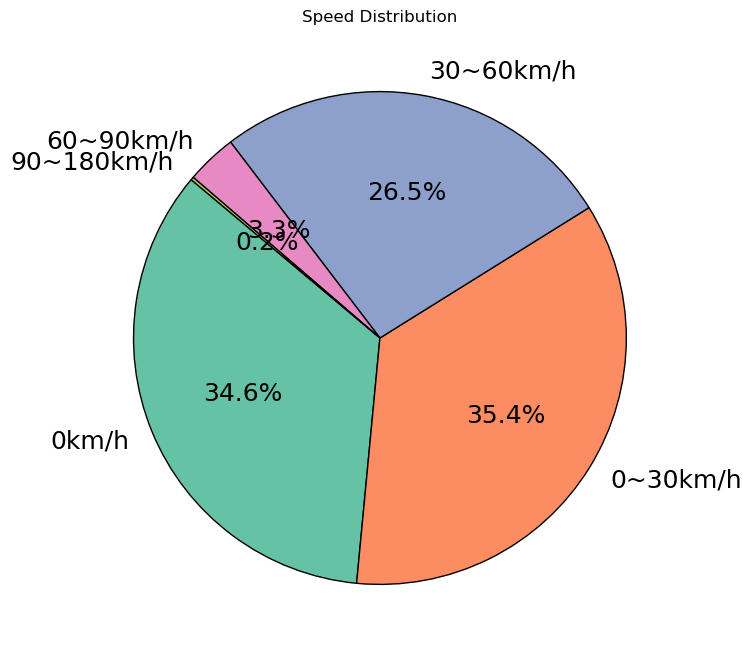

In [190]:
import matplotlib.pyplot as plt

# 데이터
categories = ["0km/h", "0~30km/h", "30~60km/h", "60~90km/h", "90~180km/h"]
values = [453806, 464018, 347508, 43566, 2585]

# 비율 계산
total = sum(values)
percentages = [v / total * 100 for v in values]

# 색상 설정
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

# 파이 차트 생성
plt.figure(figsize=(8, 8))
plt.pie(
    percentages, 
    labels=categories, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 18}  # 내부 텍스트 폰트 크기
)

# 제목 설정
plt.title("Speed Distribution")

# 출력
plt.show()

## 주차중 SOC 80% 이상 혹은 SOC 20% 이하인 상태의 횟수

In [224]:
# SOC 조건에 따른 갯수 계산 함수
def count_soc_conditions(df):
    soc_start_80_plus = (df['soc_start'] >= 80).sum()
    soc_end_80_plus = (df['soc_end'] >= 80).sum()
    soc_start_20_below = (df['soc_start'] <= 20).sum()
    soc_end_20_below = (df['soc_end'] <= 20).sum()

    return {
        'soc_start_80_plus': soc_start_80_plus,
        'soc_end_80_plus': soc_end_80_plus,
        'soc_start_20_below': soc_start_20_below,
        'soc_end_20_below': soc_end_20_below
    }

for charge_type in ['discharge', 'fast_charge']:
    tdf1 = df1[df1['charge_type'] == charge_type]
    tdf2 = df2[df2['charge_type'] == charge_type]
    print('')
    print(charge_type)
    # tdf1 조건 계산
    tdf1_counts = count_soc_conditions(tdf1)

    # tdf2 조건 계산
    tdf2_counts = count_soc_conditions(tdf2)

    # 결과 출력
    print("tdf1 조건별 갯수:", tdf1_counts)
    print("tdf2 조건별 갯수:", tdf2_counts)


discharge
tdf1 조건별 갯수: {'soc_start_80_plus': 47, 'soc_end_80_plus': 9, 'soc_start_20_below': 0, 'soc_end_20_below': 0}
tdf2 조건별 갯수: {'soc_start_80_plus': 60, 'soc_end_80_plus': 11, 'soc_start_20_below': 0, 'soc_end_20_below': 0}

fast_charge
tdf1 조건별 갯수: {'soc_start_80_plus': 0, 'soc_end_80_plus': 39, 'soc_start_20_below': 0, 'soc_end_20_below': 0}
tdf2 조건별 갯수: {'soc_start_80_plus': 0, 'soc_end_80_plus': 47, 'soc_start_20_below': 0, 'soc_end_20_below': 0}


## 주차중 SOC 80% 이상 혹은 SOC 20% 이하인 상태의 총 시간

In [274]:
# 두 형식을 모두 지원하도록 동적 처리
def to_seconds(date_str):
    if '.' in date_str:
        date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S.%f")
    elif len(date_str) >= 23:
        date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S:%f")
    else:
        date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
    return date_obj.timestamp()
cnt1 = 0
total_time1 = 0
for i in range(len(df1)):
    if i+1 == len(df1):
        break
    if (df1.iloc[i]['charge_type'] == 'discharge' and df1.iloc[i]['soc_end'] >= 80):
        total_time1 += to_seconds(df1.iloc[i+1]['start_time']) - to_seconds(df1.iloc[i]['end_time'])
        cnt1+=1
    if (df1.iloc[i]['charge_type'] == 'fast_charge' and df1.iloc[i]['soc_end'] >= 80):
        total_time1 += to_seconds(df1.iloc[i+1]['start_time']) - to_seconds(df1.iloc[i]['end_time'])
        cnt1+=1
total_time1/3600, cnt1

(289.8342694446113, 48)

In [275]:

cnt1=0
total_time2 = 0
for i in range(len(df2)):
    if i+1 == len(df2):
        break
    if (df2.iloc[i]['charge_type'] == 'discharge' and df2.iloc[i]['soc_end'] >= 80):
        total_time2 += to_seconds(df2.iloc[i+1]['start_time']) - to_seconds(df2.iloc[i]['end_time'])
        cnt1+=1
    if (df2.iloc[i]['charge_type'] == 'fast_charge' and df2.iloc[i]['soc_end'] >= 80):
        total_time2 += to_seconds(df2.iloc[i+1]['start_time']) - to_seconds(df2.iloc[i]['end_time'])
        cnt1+=1
total_time2/3600, cnt1

(485.57346666667195, 58)